### 대출 상환 : https://www.kaggle.com 사이트에서 loan repayment로 검색
- 대출 해주면 반환 할지 안할지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/program Files (x86)/Graphviz2.38/bin/'

In [10]:
loans = pd.read_csv('loans.csv')    # 대출 해주면 반환
loans.shape

(9578, 14)

In [11]:
loans.head(3)  #  dti : 총 수입 대비 상환 능력

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0


In [12]:
#누락 데이터 체크
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [13]:
loans = loans.dropna()
loans.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [15]:
loans.columns  #  installment = 분할, int.rate = 이자율

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [16]:
loans['not.fully.paid'].mean()  # 15%가 돈은 안 갚음.

0.1598360655737705

In [19]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

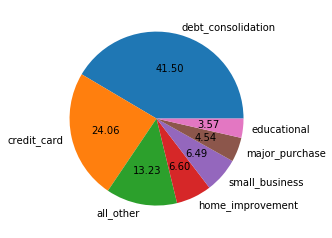

In [21]:
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(), autopct='%.2f')

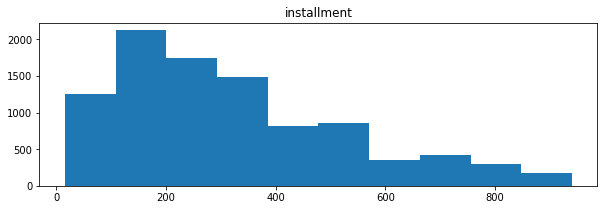

In [22]:
plt.figure(figsize=(10,3))
p = plt.hist(loans['installment'])
p = plt.title('installment')

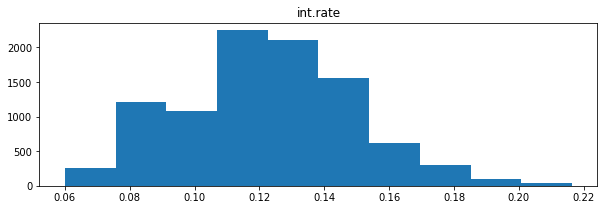

In [23]:
plt.figure(figsize=(10,3))
p = plt.hist(loans['int.rate'])
p = plt.title('int.rate')

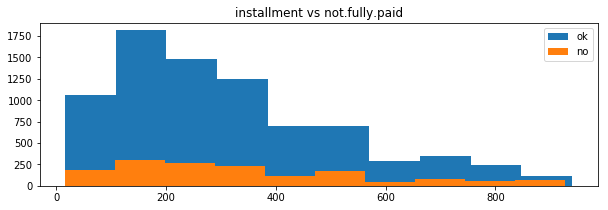

In [28]:
plt.figure(figsize=(10,3))
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs not.fully.paid')
p = plt.legend()

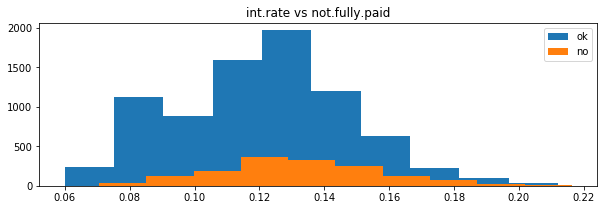

In [29]:
plt.figure(figsize=(10,3))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate vs not.fully.paid')
p = plt.legend()

In [30]:
loans = pd.get_dummies(loans) # 카테고리를 원핫 인코딩

In [32]:
loans.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0


In [35]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

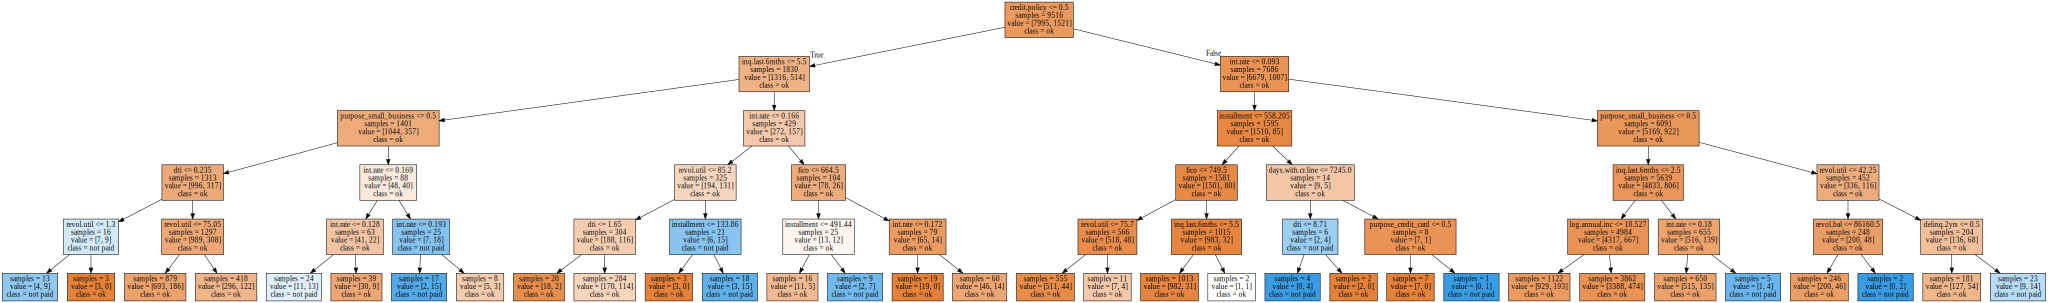

In [37]:
export_graphviz(model, out_file='loan.dot', class_names=['ok', 'not paid'],
               feature_names=X.columns, impurity=False, filled=True) 
with open('loan.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)    
display(g)